# INTEGRATE Fraastad example

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    %load_ext autoreload
    %autoreload 2
    pass

import integrate as ig
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#file_gex= ig.get_gex_file_from_data(f_data_h5, id=id)
f_data_h5 = 'Fra20200930_202001001_1_AVG_export.h5'
file_gex ='fraastad_ttem.gex'
print("Using GEX file: %s" % file_gex)

N=1000
doForward = True
doInv = doForward
hardcopy=True

Using GEX file: fraastad_ttem.gex


## 1. Setup the prior model, $\rho(\mathbf{m},\mathbf{d})$.

A1. CONSTRUCT PRIOR MODEL OR USE EXISTING
RHO_min = 1
RHO_max = 1500
z_max = 50 

useP=3
if useP==1:
    ## Layered model
    #f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=5, z_max = z_max, rho_dist='log-uniform', RHO_min=RHO_min, RHO_max=RHO_max)
    #f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='uniform', z_max = z_max, NLAY_min=1, NLAY_max=3, rho_dist='log-uniform', RHO_min=RHO_min, RHO_max=RHO_max)
    f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='uniform', z_max = z_max, NLAY_min=1, NLAY_max=8, rho_dist='log-uniform', RHO_min=RHO_min, RHO_max=RHO_max)
elif useP==2:
    ## N layer model with increasing thickness
    #f_prior_h5 = ig.prior_model_workbench(N=N, z2 = 30, nlayers=20, rho_min = RHO_min, rho_max = RHO_max)
    #f_prior_h5 = ig.prior_model_workbench(N=N, z2 = 30, nlayers=5, rho_dist='log-uniform', rho_min = RHO_min, rho_max = RHO_max)
    f_prior_h5 = ig.prior_model_workbench(N=N, rho_mean=45, rho_std=55, rho_dist='log-normal', z2 = 30, nlayers=12, rho_min = RHO_min, rho_max = RHO_max)
else:
    f_prior_h5 = 'gotaelv_Daugaard_N1000000.h5'
    f_prior_h5 = 'gotaelv2_N50000.h5'
    f_prior_h5 = 'gotaelv2_N1000000.h5'


ig.plot_prior_stats(f_prior_h5)

## 2. Compute prior data, $\rho(\mathbf{d})$.

In [5]:
if doForward:
    f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, Nproc=0, N=N)
else:
    f_prior_data_h5 = 'gotaelv_Daugaard_N1000000_fraastad_ttem_Nh280_Nf12.h5'

N=10000, N_in=10000
Creating a copy of PRIOR_WB12_N10000_log-normal_R45_55.h5 as PRIOR_WB12_N10000_log-normal_R45_55_fraastad_ttem_Nh280_Nf12.h5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:23<00:00, 13.24it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 312/312 [00:24<00:00, 12.50it/s]


Concatenating D_chunks
D.shape (10000, 39)
Time elapsed:  26.5 s, for 10000 soundings. 2.655 ms/sounding. 376.7it/s


## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [6]:

if doInv:
    N_use = 10000000
    #f_prior_data_h5 = 'gotaelv2_N1000000_fraastad_ttem_Nh280_Nf12.h5'
    updatePostStat =True
    f_post_h5 = ig.integrate_rejection(f_prior_data_h5, f_data_h5, N_use = N_use, parallel=1, updatePostStat=updatePostStat, showInfo=1)
else:
    f_post_h5 = 'POST_Fra20200930_202001001_1_AVG_export_gotaelv2_N1000000_fraastad_ttem_Nh280_Nf12_Nu1000000_aT1.h5'
# % Compute some generic statistic of the posterior distribution (Mean, Median, Std)
#if not updatePostStat:
#    ig.integrate_posterior_stats(f_post_h5)



Running: integrate_rejection.py PRIOR_WB12_N10000_log-normal_R45_55_fraastad_ttem_Nh280_Nf12.h5 Fra20200930_202001001_1_AVG_export.h5 --autoT 1 --N_use 100000 --ns 400 -parallel 1 --updatePostStat 1
psm_91a2a87f
File POST_Fra20200930_202001001_1_AVG_export_PRIOR_WB12_N10000_log-normal_R45_55_fraastad_ttem_Nh280_Nf12_Nu10000_aT1.h5 allready exists
Overwriting...
nsoundings:8786, N_use:10000, nd:39
Writing results to  POST_Fra20200930_202001001_1_AVG_export_PRIOR_WB12_N10000_log-normal_R45_55_fraastad_ttem_Nh280_Nf12_Nu10000_aT1.h5
Using 16 parallel threads.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8786/8786 [00:03<00:00, 2482.18it/s]


T_av=345.5, Time=  3.6s/8786 soundings ,0.413ms/sounding
Writing to file:  POST_Fra20200930_202001001_1_AVG_export_PRIOR_WB12_N10000_log-normal_R45_55_fraastad_ttem_Nh280_Nf12_Nu10000_aT1.h5
PRIOR_WB12_N10000_log-normal_R45_55_fraastad_ttem_Nh280_Nf12.h5: M1.is_discrete=0
D1: NOT RECOGNIZED
M1: CONTINUOUS
Creating /M1/Mean
Creating /M1/Median
Creating /M1/Std


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8786/8786 [00:01<00:00, 8207.18it/s]


### Plot some statistics from $\sigma(\mathbf{m})$

(1, 100)
EV_min=-2499.387354, EV_max=0.000000
[20 20 20 ...  4  4  3]


1

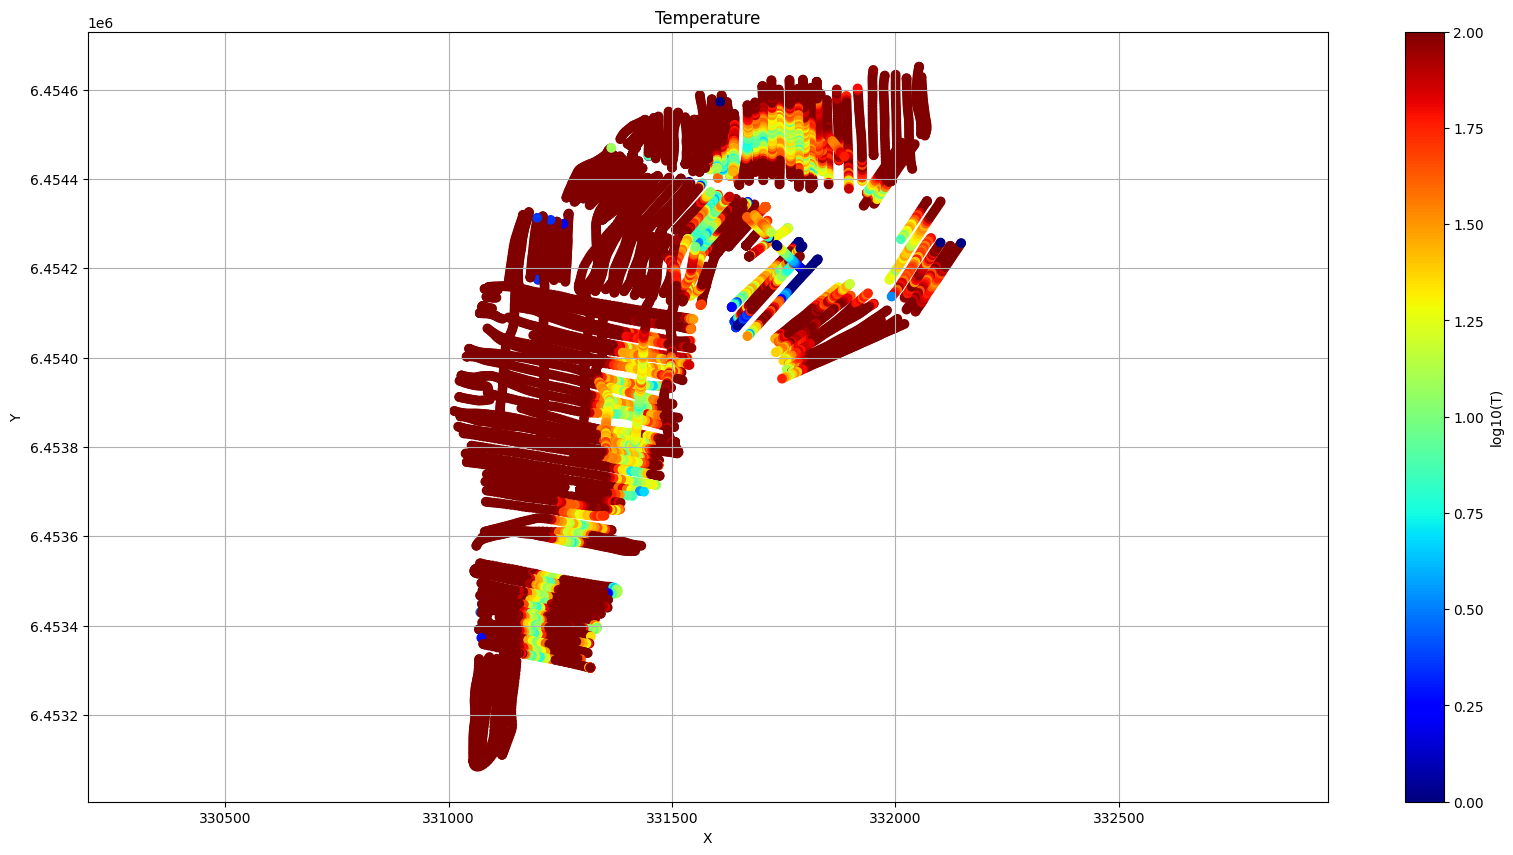

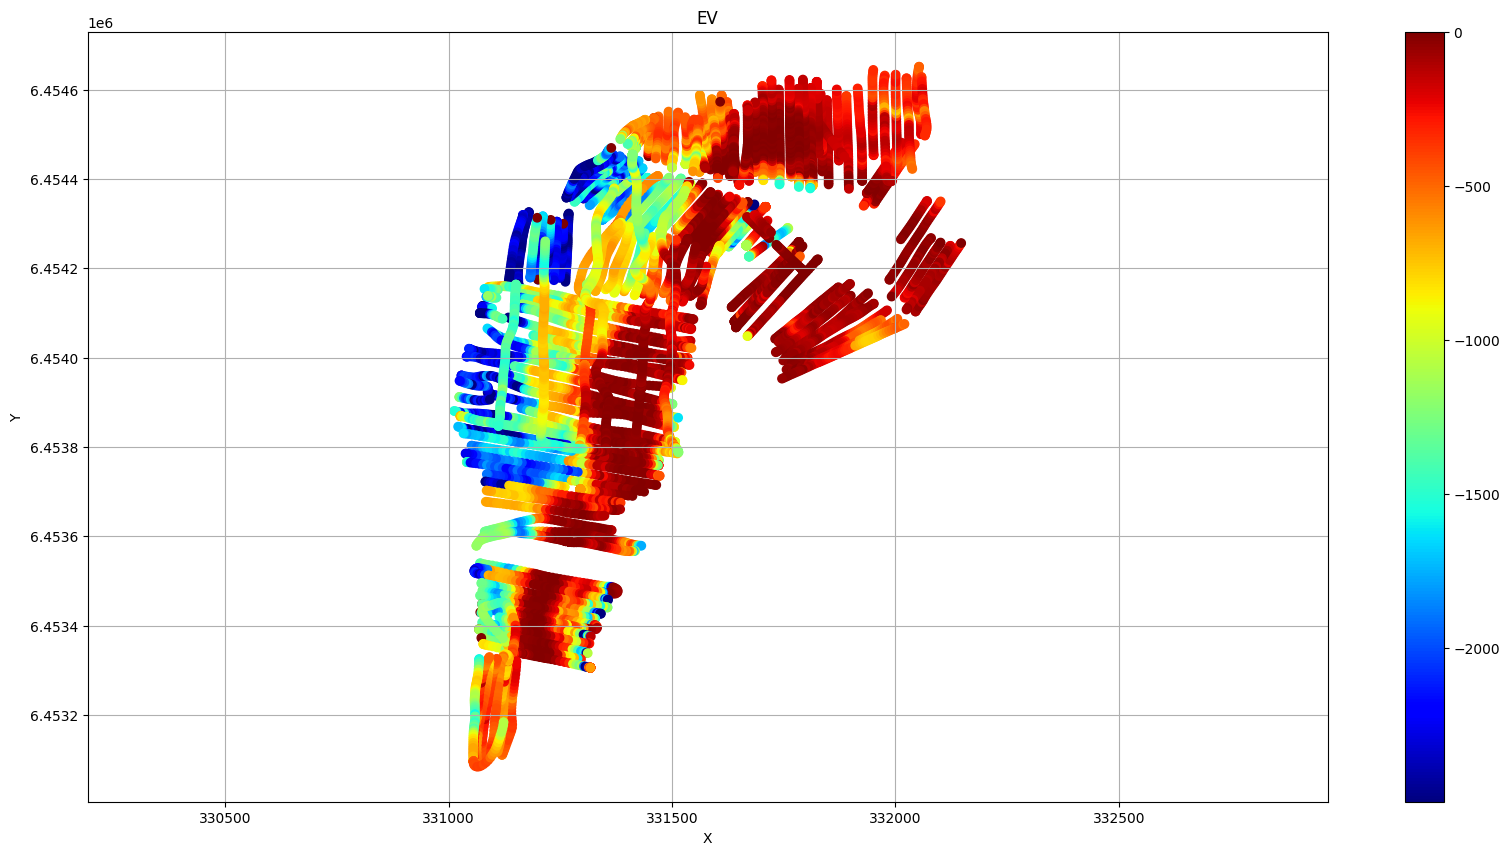

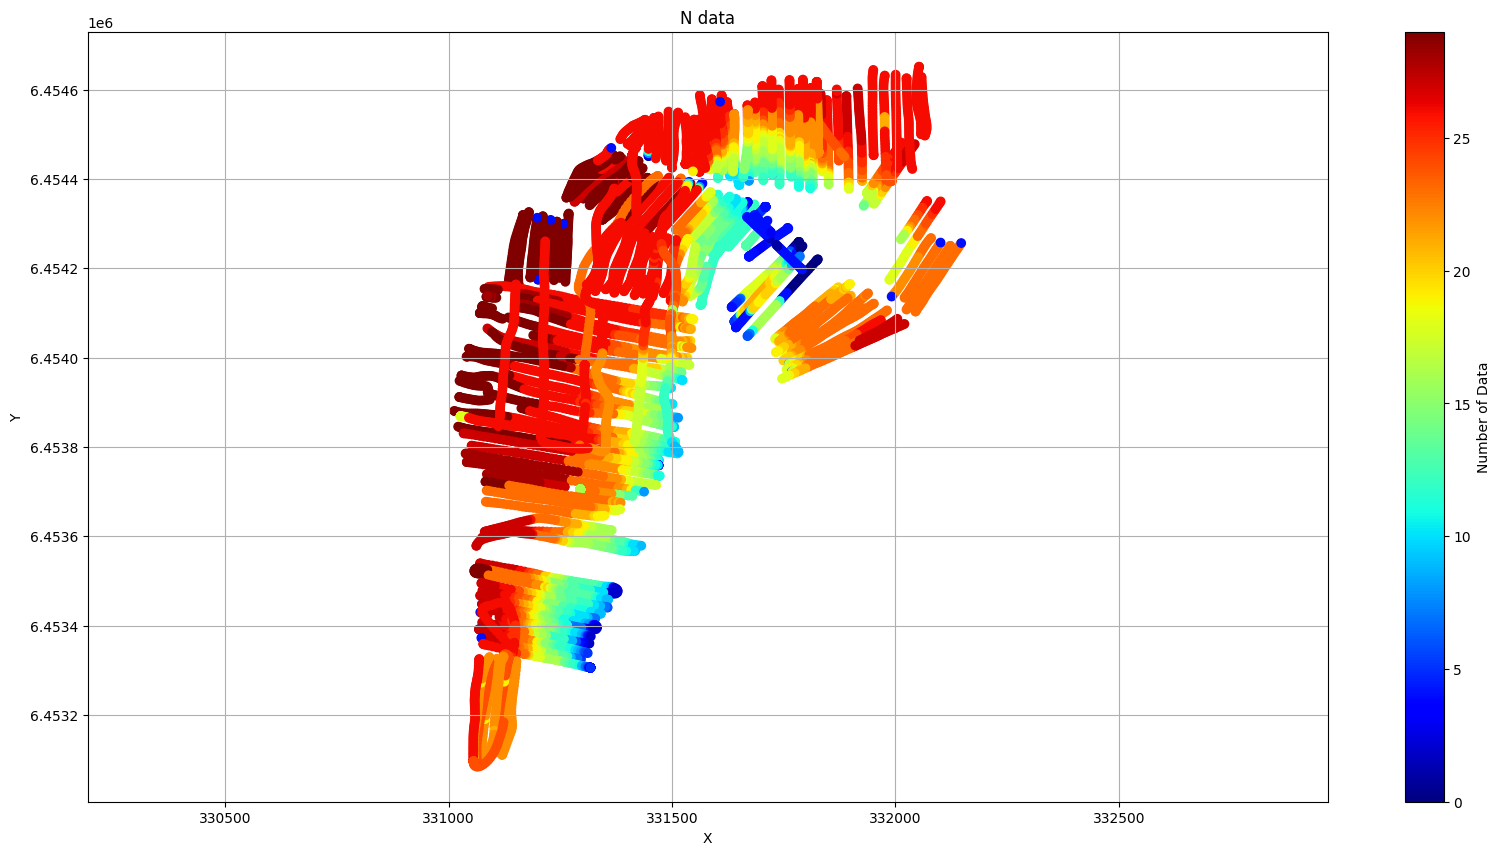

In [7]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T', hardcopy=hardcopy)
ig.plot_T_EV(f_post_h5, pl='EV', hardcopy=hardcopy)
ig.plot_T_EV(f_post_h5, pl='ND', hardcopy=hardcopy)
#

16.717366710686285
156.74064931016144


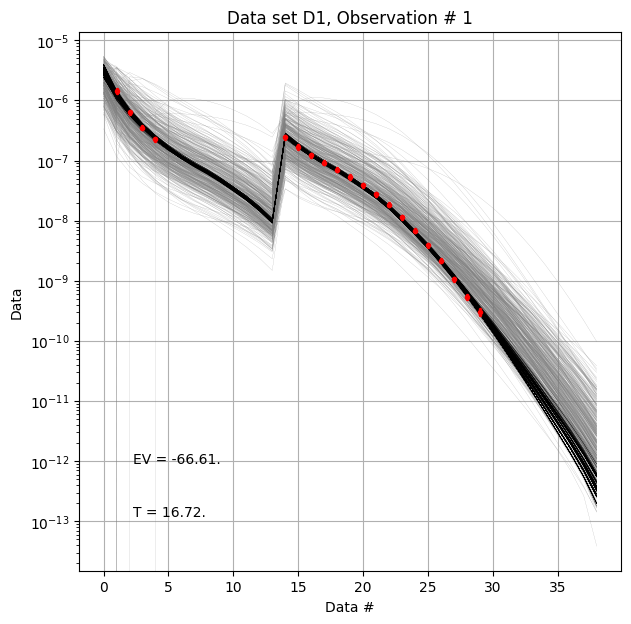

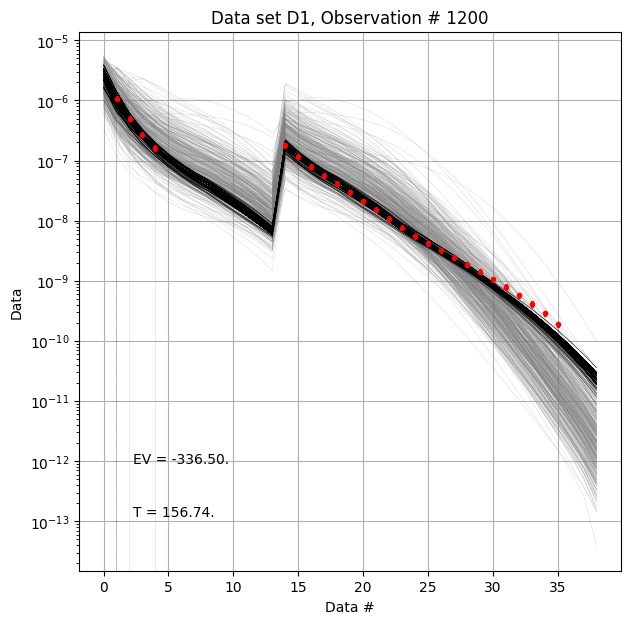

In [8]:
ig.plot_data_prior_post(f_post_h5, i_plot = 0, hardcopy=hardcopy)
ig.plot_data_prior_post(f_post_h5, i_plot = 1199, hardcopy=hardcopy)

1
Plotting profile /M1 from POST_Fra20200930_202001001_1_AVG_export_PRIOR_WB12_N10000_log-normal_R45_55_fraastad_ttem_Nh280_Nf12_Nu10000_aT1.h5
[10, 500]
hot
[10, 500]


/mnt/space/space_au11687/PROGRAMMING/integrate_module/integrate/integrate_plot.py:465: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im1 = ax[0].pcolormesh(ID[:,i1:i2], ZZ[:,i1:i2], Mean[:,i1:i2],
/mnt/space/space_au11687/PROGRAMMING/integrate_module/integrate/integrate_plot.py:474: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im2 = ax[1].pcolormesh(ID[:,i1:i2], ZZ[:,i1:i2], Median[:,i1:i2],
/mnt/space/space_au11687/PROGRAMMING/integrate_module/integrate/integrate_plot.py:484: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonical

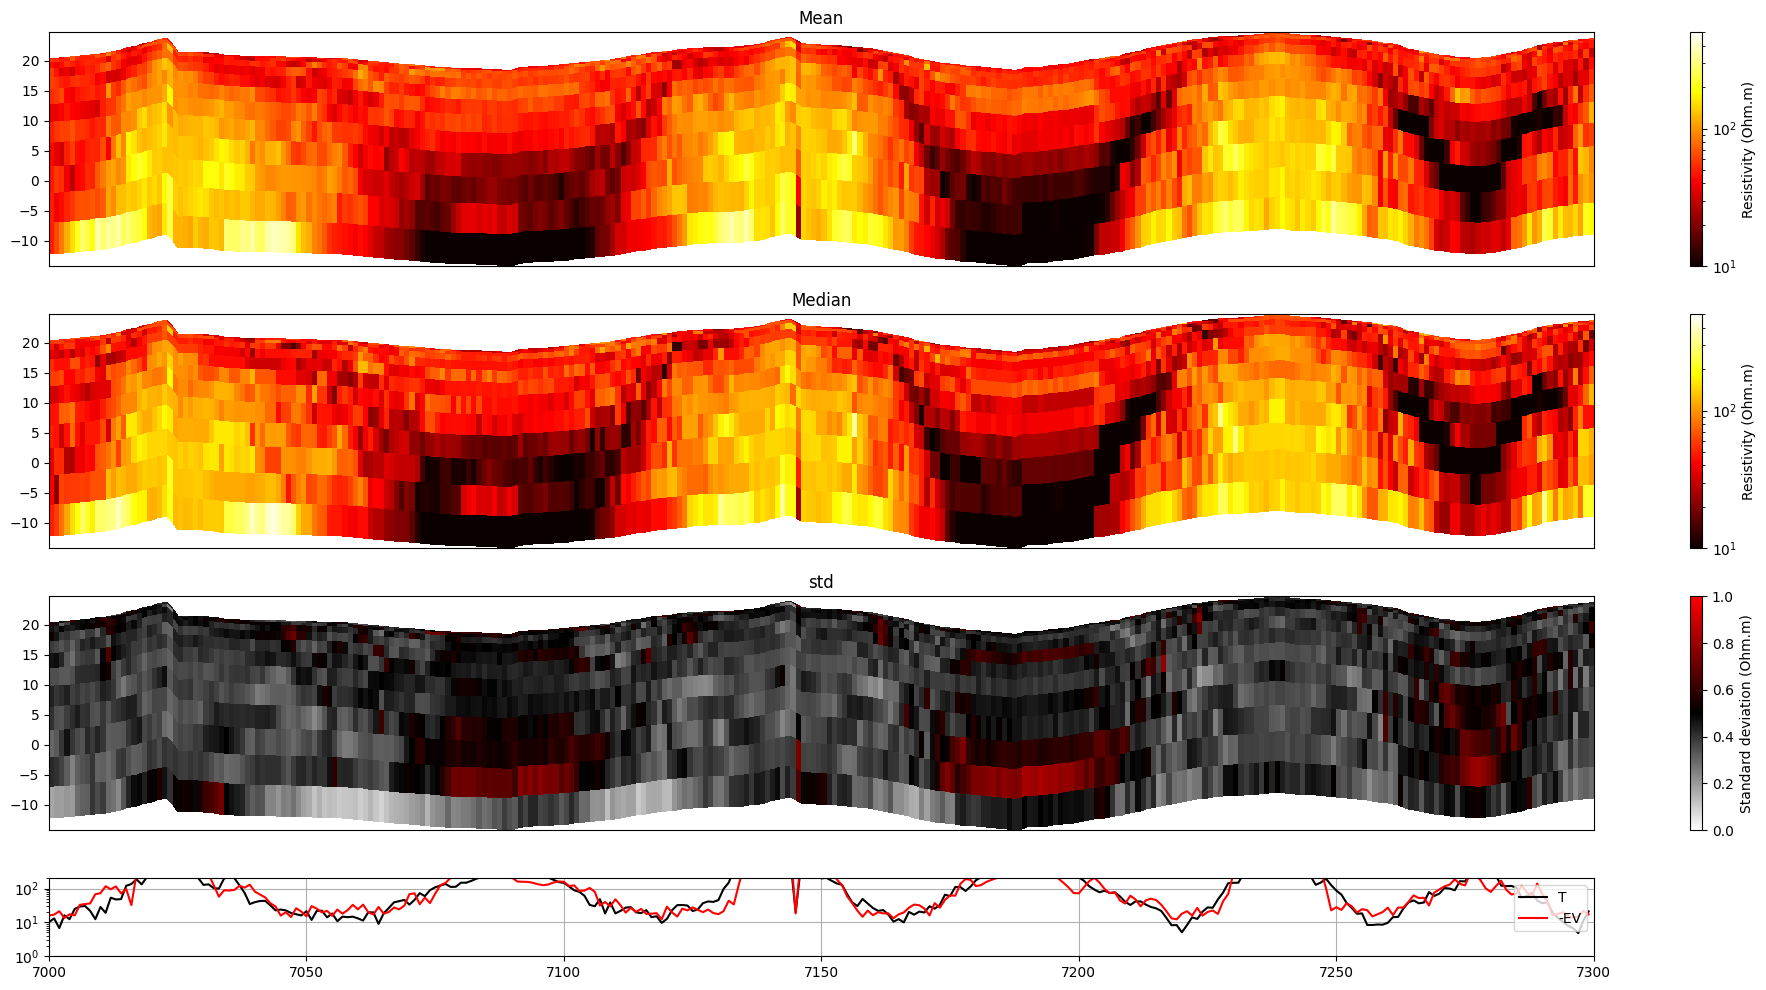

2


In [9]:
ig.plot_profile(f_post_h5, i1=7000, i2=7300, hardcopy=hardcopy)

# plot continuous parameter
#ig.plot_profile(f_post_h5, i1=7000, i2=7300, im=1)
#try:
#    # plot discrete parameter
#    ig.plot_profile(f_post_h5, i1=7000, i2=7300, im=2)
#except:
#    pass

In [10]:

## Plot a 2D feature: Resistivity in layer 10
#ig.plot_feature_2d(f_post_h5,im=1,iz=12, key='Median', uselog=1, cmap='jet', s=10, clim=np.log10([RHO_min,RHO_max]))
##ig.plot_feature_2d(f_post_h5,im=1,iz=80,key='Median')

In [11]:
#for iz in range(40):
#    ig.plot_feature_2d(f_post_h5,im=1,iz=iz, key='Median', uselog=1, cmap='jet', s=10, clim=np.log10([RHO_min,RHO_max]))

In [12]:

try:
    # Plot a 2D feature: The number of layers
    #ig.plot_feature_2d(f_post_h5,im=2,iz=0,key='Median', title_text = 'Number of layers', cmap='jet', s=12)
    ig.plot_feature_2d(f_post_h5,im=2,iz=22,key='Mode', title_text = 'Lithology Mode', cmap='jet', s=12, hardcopy=hardcopy)
except:
    pass

In [ ]:
icat=2
ig.plot_posterior_cumulative_thickness(f_post_h5,im=2, icat=icat, hardcopy=hardcopy)
ig.plot_posterior_cumulative_thickness(f_post_h5,im=2, icat=icat, property='median', hardcopy=hardcopy)
ig.plot_posterior_cumulative_thickness(f_post_h5,im=2, icat=icat, property='std', hardcopy=hardcopy)
ig.plot_posterior_cumulative_thickness(f_post_h5,im=2, icat=icat, property='relstd', hardcopy=hardcopy)

ig.plot_posterior_cumulative_thickness(f_post_h5,im=2, icat=icat, property='median', usePrior=True, hardcopy=hardcopy)

In [ ]:
for ic in [0,1,2,3,4]:
    ig.plot_posterior_cumulative_thickness(f_post_h5,im=2, icat=ic, property='median', hardcopy=hardcopy)

In [ ]:
icat = np.array([1,2])
ig.plot_posterior_cumulative_thickness(f_post_h5,im=2, icat=icat, property='median', hardcopy=hardcopy)

